--- Day 21: Step Counter ---
You manage to catch the airship right as it's dropping someone else off on their all-expenses-paid trip to Desert Island! It even helpfully drops you off near the gardener and his massive farm.

"You got the sand flowing again! Great work! Now we just need to wait until we have enough sand to filter the water for Snow Island and we'll have snow again in no time."

While you wait, one of the Elves that works with the gardener heard how good you are at solving problems and would like your help. He needs to get his steps in for the day, and so he'd like to know which garden plots he can reach with exactly his remaining 64 steps.

He gives you an up-to-date map (your puzzle input) of his starting position (S), garden plots (.), and rocks (#). For example:

...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........
The Elf starts at the starting position (S) which also counts as a garden plot. Then, he can take one step north, south, east, or west, but only onto tiles that are garden plots. This would allow him to reach any of the tiles marked O:

...........
.....###.#.
.###.##..#.
..#.#...#..
....#O#....
.##.OS####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........
Then, he takes a second step. Since at this point he could be at either tile marked O, his second step would allow him to reach any garden plot that is one step north, south, east, or west of any tile that he could have reached after the first step:

...........
.....###.#.
.###.##..#.
..#.#O..#..
....#.#....
.##O.O####.
.##.O#...#.
.......##..
.##.#.####.
.##..##.##.
...........
After two steps, he could be at any of the tiles marked O above, including the starting position (either by going north-then-south or by going west-then-east).

A single third step leads to even more possibilities:

...........
.....###.#.
.###.##..#.
..#.#.O.#..
...O#O#....
.##.OS####.
.##O.#...#.
....O..##..
.##.#.####.
.##..##.##.
...........
He will continue like this until his steps for the day have been exhausted. After a total of 6 steps, he could reach any of the garden plots marked O:

...........
.....###.#.
.###.##.O#.
.O#O#O.O#..
O.O.#.#.O..
.##O.O####.
.##.O#O..#.
.O.O.O.##..
.##.#.####.
.##O.##.##.
...........
In this example, if the Elf's goal was to get exactly 6 more steps today, he could use them to reach any of 16 garden plots.

However, the Elf actually needs to get 64 steps today, and the map he's handed you is much larger than the example map.

Starting from the garden plot marked S on your map, how many garden plots could the Elf reach in exactly 64 steps?

In [42]:
puzze_input = open("./puzzle_inputs/day21.txt").read().split("\n")

In [43]:
# Create the adjacency matrix of the graph, the starting possition is the midle of the graph
import numpy as np
def input2chararray(squaredoc: list[str]) -> np.chararray:
    """
    Given a document with all lines with the same length, create the equivalent np.chararray object
    """

    shape = (len(squaredoc[0]), len(squaredoc))

    arr = np.chararray(shape)

    # Fill the array using the characters from the list
    for i in range(len(squaredoc)):
        for j in range(len(squaredoc[0])):
            arr[i, j] = squaredoc[i][j]

    return arr


def chararray2input(arr: np.chararray) -> list[str]:
    """
    Given a np.chararray, return a list of characters with the proper shape
    """

    # Get the shape of the chararray
    rows, cols = arr.shape

    # Initialize a list to store the characters
    squaredoc = ["" for _ in range(cols)]

    # Fill the list using characters from the chararray
    for i in range(rows):
        for j in range(cols):
            squaredoc[j] += arr[i, j].decode("utf-8")

    return squaredoc

In [44]:
map_array = input2chararray(puzze_input)
print(map_array.shape)
print(map_array)

(131, 131)
[[b'.' b'.' b'.' ... b'.' b'.' b'.']
 [b'.' b'#' b'.' ... b'.' b'.' b'.']
 [b'.' b'.' b'.' ... b'.' b'#' b'.']
 ...
 [b'.' b'.' b'.' ... b'.' b'.' b'.']
 [b'.' b'.' b'.' ... b'#' b'.' b'.']
 [b'.' b'.' b'.' ... b'.' b'.' b'.']]


In [45]:
# find the node (i,j) of the start
start = np.where(map_array == b"S")
start = complex(start[0],start[1])

# Create a graph for the map. Using complex numbers should be very elegant:
""" 
    -> Translate the points into grid coordinates in the complex plane, only b".", not b"#"
    -> join every vertex that is a unit of distance from other vertices

"""

# Create a list of verteces for every index in the array, if the character is not b"#"
grass_patches = np.argwhere(map_array != b"#" )

# Create the complex representation
nodes = [complex(p[0], p[1]) for p in grass_patches]


C:\Users\andre\AppData\Local\Temp\ipykernel_14140\98709635.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start = complex(start[0],start[1])


In [46]:
#Create the edges between adjacent vertices:
graph = {node:[] for node in nodes}
for node in nodes:
    #just check if there are nodes in the four directions
    if node + 1 in nodes:
        graph[node].append(node + 1)

    if node - 1 in nodes:
        graph[node].append(node - 1)

    if node + 1j in nodes:
        graph[node].append(node + 1j)

    if node - 1j in nodes:
        graph[node].append(node - 1j)

In [47]:
""" 
Last implementation was ineficient, lets create a set of nodes, that starts with S.

Then, for every iteration, create a new list, appending all the nodes that can be reached
from S.

Swap the lists and start again
"""

reachable_nodes =set([start])
N = 64
for _ in range(N):
    new_nodes = set()
    for node in reachable_nodes:
        for v in graph[node]:
            new_nodes.add(v)

        reachable_nodes = new_nodes

len(reachable_nodes), reachable_nodes

(3733,
 {(35+99j),
  (37+99j),
  (39+99j),
  (41+99j),
  (43+99j),
  (45+99j),
  (47+99j),
  (49+99j),
  (51+99j),
  (53+99j),
  (55+99j),
  (57+99j),
  (59+99j),
  (61+99j),
  (65+99j),
  (67+99j),
  (69+99j),
  (71+99j),
  (73+99j),
  (77+99j),
  (79+99j),
  (81+99j),
  (83+99j),
  (85+99j),
  (87+99j),
  (89+99j),
  (91+99j),
  (93+99j),
  (95+99j),
  (21+85j),
  (23+85j),
  (25+85j),
  (27+85j),
  (29+85j),
  (31+85j),
  (35+85j),
  (37+85j),
  (39+85j),
  (41+85j),
  (43+85j),
  (45+85j),
  (47+85j),
  (49+85j),
  (53+85j),
  (55+85j),
  (59+85j),
  (61+85j),
  (63+85j),
  (65+85j),
  (67+85j),
  (69+85j),
  (71+85j),
  (73+85j),
  (75+85j),
  (77+85j),
  (79+85j),
  (81+85j),
  (83+85j),
  (85+85j),
  (87+85j),
  (91+85j),
  (7+71j),
  (93+85j),
  (9+71j),
  (95+85j),
  (97+85j),
  (11+71j),
  (99+85j),
  (101+85j),
  (15+71j),
  (103+85j),
  (19+71j),
  (105+85j),
  (107+85j),
  (109+85j),
  (23+71j),
  (25+71j),
  (27+71j),
  (29+71j),
  (31+71j),
  (33+71j),
  (35+71j),
  (37+

--- Part Two ---
The Elf seems confused by your answer until he realizes his mistake: he was reading from a list of his favorite numbers that are both perfect squares and perfect cubes, not his step counter.

The actual number of steps he needs to get today is exactly 26501365.

He also points out that the garden plots and rocks are set up so that the map repeats infinitely in every direction.

So, if you were to look one additional map-width or map-height out from the edge of the example map above, you would find that it keeps repeating:

.................................
.....###.#......###.#......###.#.
.###.##..#..###.##..#..###.##..#.
..#.#...#....#.#...#....#.#...#..
....#.#........#.#........#.#....
.##...####..##...####..##...####.
.##..#...#..##..#...#..##..#...#.
.......##.........##.........##..
.##.#.####..##.#.####..##.#.####.
.##..##.##..##..##.##..##..##.##.
.................................
.................................
.....###.#......###.#......###.#.
.###.##..#..###.##..#..###.##..#.
..#.#...#....#.#...#....#.#...#..
....#.#........#.#........#.#....
.##...####..##..S####..##...####.
.##..#...#..##..#...#..##..#...#.
.......##.........##.........##..
.##.#.####..##.#.####..##.#.####.
.##..##.##..##..##.##..##..##.##.
.................................
.................................
.....###.#......###.#......###.#.
.###.##..#..###.##..#..###.##..#.
..#.#...#....#.#...#....#.#...#..
....#.#........#.#........#.#....
.##...####..##...####..##...####.
.##..#...#..##..#...#..##..#...#.
.......##.........##.........##..
.##.#.####..##.#.####..##.#.####.
.##..##.##..##..##.##..##..##.##.
.................................
This is just a tiny three-map-by-three-map slice of the inexplicably-infinite farm layout; garden plots and rocks repeat as far as you can see. The Elf still starts on the one middle tile marked S, though - every other repeated S is replaced with a normal garden plot (.).

Here are the number of reachable garden plots in this new infinite version of the example map for different numbers of steps:

In exactly 6 steps, he can still reach 16 garden plots.
In exactly 10 steps, he can reach any of 50 garden plots.
In exactly 50 steps, he can reach 1594 garden plots.
In exactly 100 steps, he can reach 6536 garden plots.
In exactly 500 steps, he can reach 167004 garden plots.
In exactly 1000 steps, he can reach 668697 garden plots.
In exactly 5000 steps, he can reach 16733044 garden plots.
However, the step count the Elf needs is much larger! Starting from the garden plot marked S on your infinite map, how many garden plots could the Elf reach in exactly 26501365 steps?

In [ ]:
""" 
add edjes so that the map repeats indefinetily when you reach the edge.

Now, you can reach mutilple times the same plot, so we need to count them more then once
if you can reach it by walking into a copy of the map ... 

I NOTICED: 
    All the edjes are ".", so we can simply add the edges by iterating over them.
"""

In [41]:
puzze_input = open("./puzzle_inputs/day21.txt").read().split("\n")

In [15]:
""" 
Some ideas:
    Create extra sets when a iteration crosses a boundary (sets should be tagged with grid coords)
        We start in set (0 + 0j), if an iteration crosses the top edge we add the set (0 + 1j)

    Other posibility is to extend the graph on demand.

"""
""" 
I red something about the pattern in the number of steps, just fit a polynomial and plug in the total
number ? 
"""

N = [6,10,50,100,500,1000,5000]
steps = [16,50,1594,6536,167004,668697,16733044]

# import matplotlib.pyplot as plt

# plt.scatter(N,steps)
# plt.show()

In [23]:
coefficients = np.polyfit(N,steps, deg = 2)
coefficients

array([  0.66946915,  -0.73093262, -30.16174792])

In [24]:
poly = np.poly1d(coefficients)
prediction = poly(26501365)

# Convert the predicted value to a string without exponential notation
prediction_str = "{:.20f}".format(prediction)

# Remove trailing zeros
prediction_str = prediction_str.rstrip('0')

print("Predicted value for 26501365:", prediction_str)

Predicted value for 26501365: 470183123321325.75


In [54]:
N_list = [i for i in range(1,250,10)]
plot_list = []

for N in N_list:
    reachable_nodes =set([start])
    for _ in range(N):
        new_nodes = set()
        for node in reachable_nodes:
            for v in graph[node]:
                new_nodes.add(v)

            reachable_nodes = new_nodes

    plot_list.append(len(reachable_nodes))

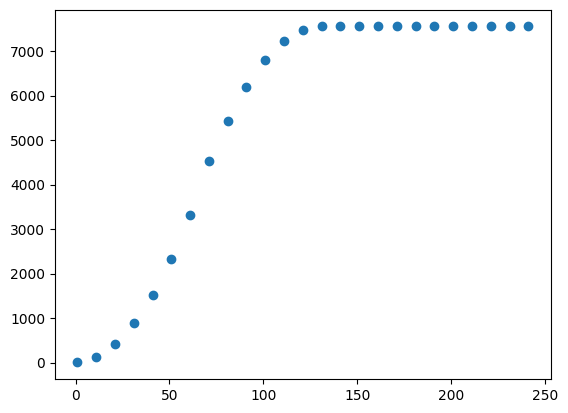

In [55]:
plt.scatter(N_list, plot_list)

In [56]:
plot_list[-5:]

[7553, 7553, 7553, 7553, 7553]

In [65]:
26501365 / 65

407713.3076923077

In [59]:
S = 1 
for i in range(353350):
    S += i*4
print(S)

249711738301


In [ ]:
# S (353351) = 249713151701
# S (353350) = 249711738301 
# frontera de S = 1413400

In [60]:
249713151701 - 249711738301

1413400

In [72]:
"""
65  steps: 3703 plots
196 steps: 32957 plots
327 steps: 91379 plots
458 steps: 178969 plots
589 steps: 295727 plots
"""

steps = [65, 196, 327,458,589]
plots =[3703,32957 ,91379, 178969, 295727]

coefficients = np.polyfit(steps,plots, deg = len(steps))
coefficients

C:\Users\andre\AppData\Local\Temp\ipykernel_14140\2800127346.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(steps,plots, deg = len(steps))


array([ 3.52360641e-10, -5.76109648e-07,  3.46541405e-04,  7.56288122e-01,
        1.23667562e+01, -3.81450324e+02])

In [76]:
def lagrange_interpolation(steps, plots, x):
    n = len(steps)
    result = 0
    for i in range(n):
        term = plots[i]
        for j in range(n):
            if j != i:
                term *= (x - steps[j]) / (steps[i] - steps[j])
        result += term
    return result

steps = [65, 196, 327, 458, 589]
plots = [3703, 32957, 91379, 178969, 295727]

x = 26501365
result = lagrange_interpolation(steps, plots, x)
print("El valor interpolado para steps =", x, "es:", result)


El valor interpolado para steps = 26501365 es: 596863015190528.0
